# Relationship between public debt and GDP growth 


This project seeks to analyse the relationship between public debt and real GDP growth in Sub-Saharan countries. Furthermore, we analyse this relationship for Oil exporting countries, Resource-intensive and non-resource-intensive countries. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [52]:
gdp_file = 'GDPGrowthData-All.csv'
debt_file = 'DebtData-All.csv'

# Cleaning the data
GDPData, DebtData = dp.clean_data(gdp_file, debt_file)
#The two datasets are identical in structure, so we will only display one of them in the data cleaning proces
display(GDPData) 

,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
5,Burundi,"0,743909609","3,894884711","2,343502082","0,438788825","1,511822841","0,496366831","1,864499325","0,904561102","1,30621554",...,"-6,699029126","-3,682188998","-2,616273126","-1,349595931","-1,123815647","-2,58728668","0,11582752","-1,139027758","0,326282418","2,864291017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SACU,"3,312286951","4,006795954","4,270289058","3,952898993","1,68223057","-3,332420117","1,807899378","1,767728683","0,873047595",...,"-0,32778796","-0,598225697","-0,3204375","0,141713431","-1,09008336","-7,422353175","4,032143568","1,329445603","-0,375026401","0,432626288"
64,SADC,"3,533208259","4,397780193","4,123110456","4,732275007","2,517471107","-2,035991739","2,41748589","2,093085052","2,094442191",...,"-0,004705216","-0,867925616","-0,12219354","0,124224185","-0,803187898","-6,190302847","2,698348313","1,588481855","0,359179872","0,99773713"
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"


Using the IMF AFR Regional Economic Outlook we import datasets for Real Per Capita GDP Growth (Annual percent change) and the Government Debt (Percent of GDP).

In [40]:
#We import the GDPData and DebtData and inspect the data
GDPData = pd.read_csv('GDPGrowthData-All.csv', delimiter=';')
DebtData = pd.read_csv('DebtData-All.csv', delimiter=';')
#The two datasets are identical in structure, so we will only display one of them in the data cleaning proces
# Get rid of empty rows
GDPData.dropna(how='all', inplace=True)
DebtData.dropna(how='all', inplace=True)
# Get rid of last row
# Get the index of the last row
last_row_index_GDP = GDPData.index[-1]
last_row_index_Debt = DebtData.index[-1]

# Drop the last row
GDPData.drop(last_row_index_GDP, inplace=True)
DebtData.drop(last_row_index_Debt, inplace=True)
display(GDPData)

,Real Per Capita GDP Growth (Annual percent change),2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Angola,"7,13002378","11,0085151","7,611984132","9,9352311","7,159206471","-2,798670973","1,015170454","-0,345131558","4,538092554",...,"-2,642971423","-6,011877291","-3,633445779","-4,676609243","-4,017052156","-8,672491127","-1,954664333","-0,438960711","-1,694201086","0,266323328"
2,Benin,"1,316505223","-1,467824074","0,811426917","2,982034825","1,849634571","-0,648430263","-0,839369886","-0,007422704","1,800063786",...,"-1,181677804","0,335852248","2,603556528","3,624262544","3,824506878","0,951937862","4,129264432","3,319872865","2,587637195","3,398716724"
3,Botswana,"-0,360239488","3,102066272","4,060814622","3,734067816","1,176918798","-15,89055765","7,875871145","4,717165868","-2,070174149",...,"-6,699965248","5,048819767","1,970663783","2,083051442","1,042060184","-10,40033003","10,05052587","4,098347015","2,092020193","2,412381096"
4,Burkina Faso,"1,250803723","5,293432973","2,986692134","1,001302626","2,731085635","-0,01247427","5,305144555","3,502706594","3,273591496",...,"0,877785605","2,893498327","3,203256836","3,692238467","2,869545172","-0,852021147","3,985314091","-1,290475581","1,520630401","3,542102401"
5,Burundi,"0,743909609","3,894884711","2,343502082","0,438788825","1,511822841","0,496366831","1,864499325","0,904561102","1,30621554",...,"-6,699029126","-3,682188998","-2,616273126","-1,349595931","-1,123815647","-2,58728668","0,11582752","-1,139027758","0,326282418","2,864291017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SACU,"3,312286951","4,006795954","4,270289058","3,952898993","1,68223057","-3,332420117","1,807899378","1,767728683","0,873047595",...,"-0,32778796","-0,598225697","-0,3204375","0,141713431","-1,09008336","-7,422353175","4,032143568","1,329445603","-0,375026401","0,432626288"
64,SADC,"3,533208259","4,397780193","4,123110456","4,732275007","2,517471107","-2,035991739","2,41748589","2,093085052","2,094442191",...,"-0,004705216","-0,867925616","-0,12219354","0,124224185","-0,803187898","-6,190302847","2,698348313","1,588481855","0,359179872","0,99773713"
65,SSA excluding Nigeria and South Africa,"3,447278261","3,571687695","2,839090371","3,885951663","3,184049438","0,788599844","3,19731919","3,058760784","3,165871901",...,"1,469502252","0,68727074","1,941754006","1,875342535","2,014401423","-2,581545887","2,64120069","2,423211085","1,842827162","2,548018914"
66,Sub-Saharan Africa,"4,47179197","3,880782451","3,526908206","4,072343542","3,107110311","1,090903492","4,198545091","2,44582409","2,186454234",...,"0,702514019","-0,922622032","0,502777856","0,856381803","0,777393288","-3,90083797","2,464749774","1,755495001","1,032155308","1,656233947"


We want to make this into panel data 'long format' for the merge of the datasets later. 

In [57]:
GDP_panel_data, Debt_panel_data = dp.clean_and_transform_data(gdp_file, debt_file)
display(GDP_panel_data)

,Country name,Year,Real per capita GDP growth rate
0,Angola,2004,"7,13002378"
67,Angola,2005,"11,0085151"
134,Angola,2006,"7,611984132"
201,Angola,2007,"9,9352311"
268,Angola,2008,"7,159206471"
...,...,...,...
1116,Zimbabwe,2020,"-9,505027888"
1183,Zimbabwe,2021,"6,306549466"
1250,Zimbabwe,2022,"4,045850717"
1317,Zimbabwe,2023,"1,900288606"


# Merging the data

We merge the two datasets using an inner merge. 

In [61]:
Merged_data = dp.clean_transform_merge_data(gdp_file, debt_file)
display(Merged_data)

,Country name,Year,Real per capita GDP growth rate,Government debt (Percent of GDP)
0,Angola,2004,7.130024,47.717067
1,Angola,2005,11.008515,33.464042
2,Angola,2006,7.611984,18.728790
3,Angola,2007,9.935231,21.043494
4,Angola,2008,7.159206,31.378232
...,...,...,...,...
1402,Zimbabwe,2020,-9.505028,84.365446
1403,Zimbabwe,2021,6.306549,59.768938
1404,Zimbabwe,2022,4.045851,98.449377
1405,Zimbabwe,2023,1.900289,95.434616


# Plots and Analysis

To explore the data we first split the data into groups based on country name. Then we apply a function to compute summary statistics. Then we combine our results into a new DataFrame and plot the results


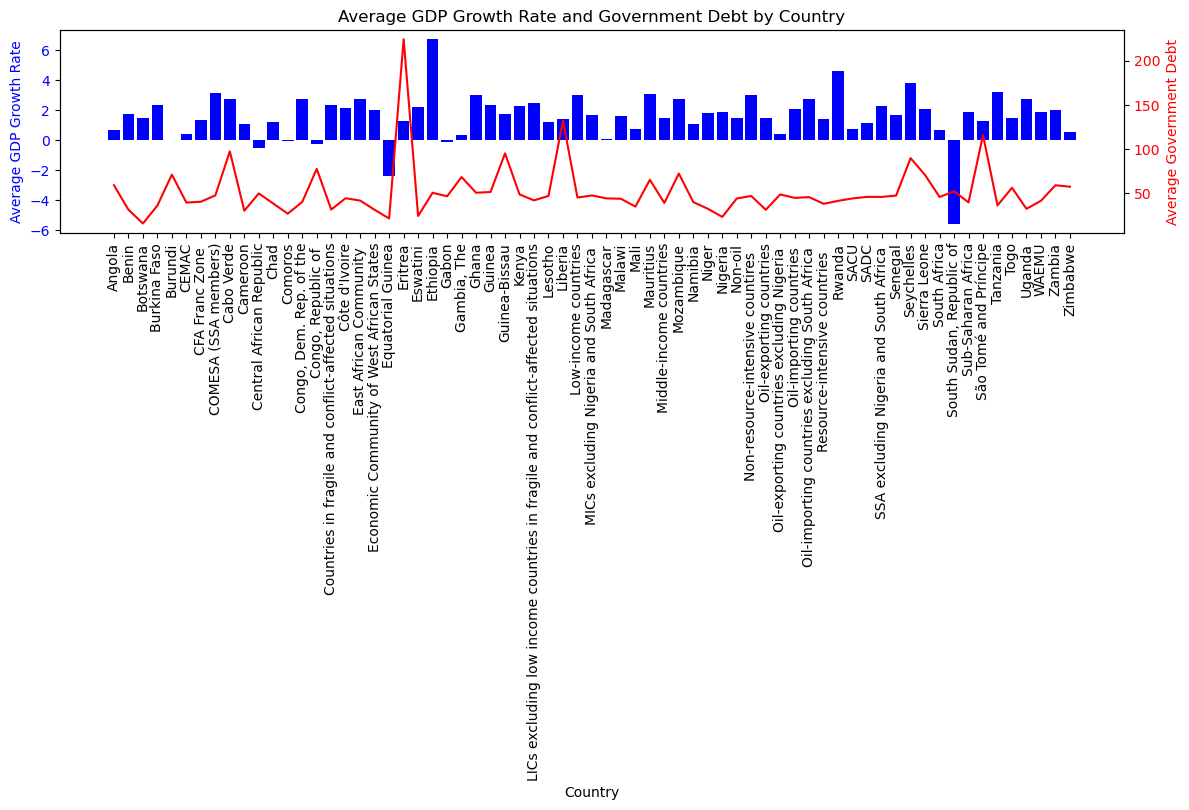

In [66]:
summary_statistics = dp.calculate_summary_statistics(Merged_data)

# Plotting the summary statistics
dp.plot_summary_statistics(summary_statistics)

To explore the data further we make an interactive plot where you can see the GDP Growth and Public Debt by choosing the desired country in the drop down menu. 

In [63]:
merged_data = dp.clean_transform_merge_data(gdp_file, debt_file)
dp.create_interactive_plot(merged_data)

interactive(children=(Dropdown(description='Country:', options=('Angola', 'Benin', 'Botswana', 'Burkina Faso',…

For most of the countries it indicates a negative correlation between GDP Growth and Public Debt. To analyse this further we look at the plot of the average, which is already calculated in the Data called 'Sub-Saharan Africa'. 

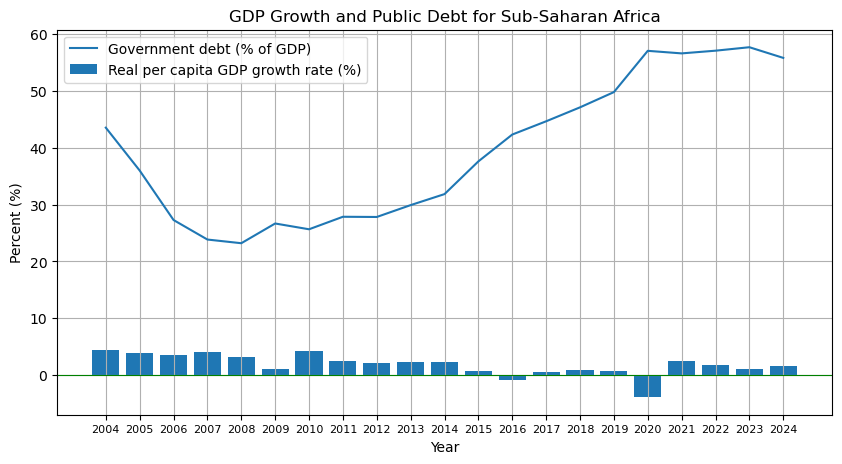

In [69]:

# Filter data for 'Sub-Saharan Africa'
country_name = 'Sub-Saharan Africa'
country_data = dp.filter_country_data(merged_data, country_name)

# Plot the data for the selected country
dp.plot_country_data(country_data, country_name)

Here we see indications of a negative correlation between GDP Growth and Public Debt. We see that in years with high GDP growth we have relative lower government debt. To analyse it formally we calculate the correlation. 


In [73]:
# Calculate correlation for 'Sub-Saharan Africa'
country_name = 'Sub-Saharan Africa'
correlation = dp.calculate_correlation(merged_data, country_name)

Correlation between GDP Growth and Public Debt for Sub-Saharan Africa: -0.5261353480453865


Now we want to focus on the two groups of countries defined as Oil exporting countries, Resource-intensive countries and Non-resource-intensive countries in the data. Oil exporting countries are defined as countries net oil exports make up 30 percent or more of total exports. Other Resource-intensive countries are defined as countries where nonrenewable natural resources represent 25 percent or more of total exports. The Non-resource-intensive countries refer to those that are not classified as either oil exporters or other resource-intensive countries.

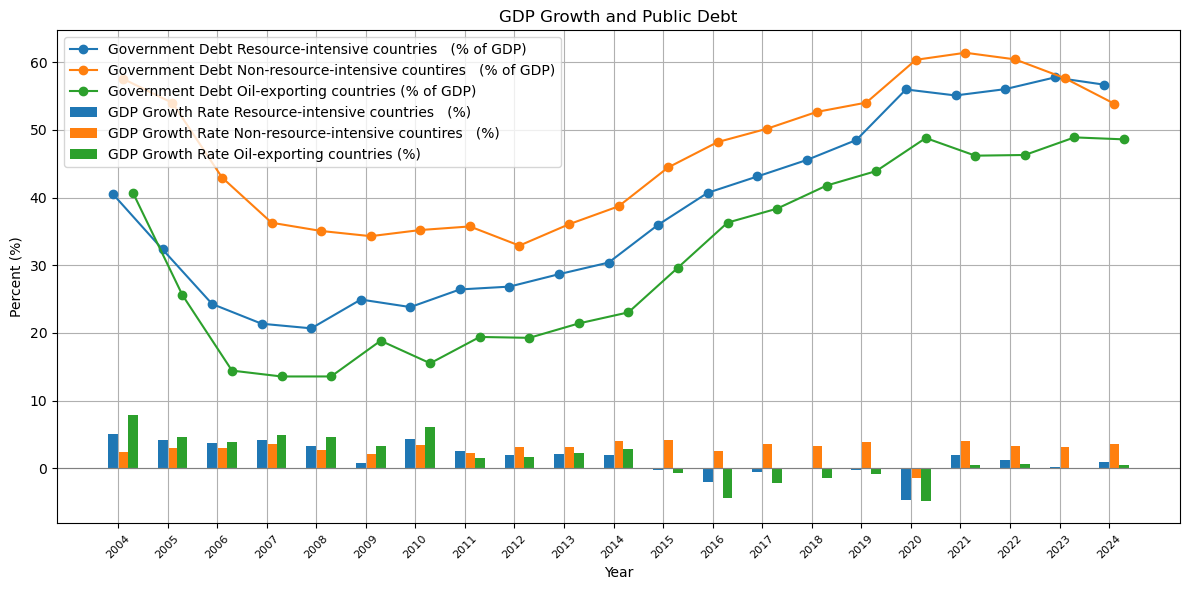

In [78]:
# Define the countries to include
countries = ['Resource-intensive countries  ', 'Non-resource-intensive countires  ', 'Oil-exporting countries']

# Plot the data for the selected countries
dp.plot_selected_countries(merged_data, countries)

We see that Oil exporting countries seem to have a very strong negative correlation between GDP Growth and Public Debt. Resource-intensive countries seem to have a less strong negative correlation similar to the total average ('Sub-Saharn countries'). Non-resource-intensive countries does not have the same strong negative correlation between GDP Growth and Public Debt that we see for the other countries. To analyse this formally we calculate the correlation between GDP Growth and Public Debt for the three groups.

In [83]:
# Calculate and print correlations
dp.calculate_correlations(merged_data)

Correlation between GDP Growth and Public Debt for Oil exporting countries:
-0.596568724929458
Correlation between GDP Growth and Public Debt for Resource-intensive countries:
-0.5848835133300879
Correlation between GDP Growth and Public Debt for Non-resource-intensive countries:
-0.15767659972774384


# Conclusion

From our analysis we can conclude an average negative correlation of -0.526 between GDP Growth and Public Debt for Sub-Saharan countries. The strongest negative correlation between GDP Growth and Public Debt is observed for Oil exporting countries with a negative correlation of -0.597 and a negative correlation of -0.585 for Resource-intensive countries. However this negative correlation is not as strong for Non-intensive countries where we only observe a negative correlation at -0.158. 